# 📢 Penjelasan Isi File
---


Pada tahap ini, saya akan fokus melakukan Exploratory Data Analysis (EDA) dan Preprocessing terhadap data URL dari paper [LOOK BEFORE YOU LEAP](https://www.sciencedirect.com/science/article/pii/S0957417423016858)

# ✅ **Conclusion**

---


- Data URL **terdapat kategori Phishing dan Non-phishing**

- Data URL-nya mayoritas tidak memiliki http atau https ataupun www

- Data duplikat sebanyak 1295 telah dihapus, menyisakan satu set data unik untuk setiap data yang sebelumnya terduplikasi.

- Jumlah data dalam kategori Phishing dan Non-Phishing hampir seimbang, dengan perbedaan sekitar 1000 data dari total sekitar 20.000 data dalam setiap kategori.

- URL terpendek dan terpanjang ditemukan dalam kategori Phishing.

- Sebagian besar URL Phishing menggunakan TLD 'com', menamai URL sesuai nama file seperti 'login.php' atau 'index.html', dan menggunakan layanan hosting gratis seperti 000webhostapp.

- 4 TLD teratas yang sering digunakan dalam URL Phishing adalah 'com', 'ru', 'net', dan 'org', sementara dalam URL Non-phishing, TLD yang sering digunakan adalah 'com', 'org', 'edu', dan 'edu'.

- 3 domain gratisan teratas yang sering digunakan dalam URL Phishing adalah 000webhostapp, blogspot, dan duckdns, sedangkan dalam URL Non-phishing, domain yang sering digunakan adalah ietf, angelfire, dan tripod.

- 2 subdomain teratas yang sering digunakan dalam URL Phishing adalah tidak ada subdomain dan 'www', sedangkan dalam URL Non-phishing, subdomain yang sering digunakan adalah 'www' dan 'tools'.

# 🎯 **Step 0: Import library**
---

In [1]:
!pip -q install imojify

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import json
import nltk
import re

from imojify import imojify
from collections import Counter
from wordcloud import WordCloud
from itertools import islice, chain
from nltk.tokenize import word_tokenize
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from sklearn.feature_extraction.text import CountVectorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 41.4 MB/s eta 0:00:00


In [2]:
plt.style.use('seaborn-v0_8')

In [3]:
matplotlib.__version__

'3.7.1'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load dataset**
---

## ✨ 1.1 - Dataset Phishing No Augmentasi

In [29]:
path = '/content/drive/MyDrive/TUGAS AKHIR/Dataset/PESAN TEKS/DATASET_PHISHING_NO_AUGMENTASI.xlsx'

df_phishing_no_aug = pd.read_excel(path)

df_phishing_no_aug.head()

,Data
0,PEMBERITAHUAN RESMI\n\nAnda Terdaftar Sebagai ...
1,SELAMAT ANDA TERPILIH SEBAGAI PENERIMA DANA BA...
2,Langsung dapat ekstra 100% di depan\nUntuk pen...
3,PEMBERITAHUAN RESMI\nSelamat ANDA TERPILIH Seb...
4,"Gapai impianmu dsni, Ksmpatan emas\ninfo pst j..."


In [30]:
df_phishing_no_aug['Category'] = 'phishing'

df_phishing_no_aug.head()

,Data,Category
0,PEMBERITAHUAN RESMI\n\nAnda Terdaftar Sebagai ...,phishing
1,SELAMAT ANDA TERPILIH SEBAGAI PENERIMA DANA BA...,phishing
2,Langsung dapat ekstra 100% di depan\nUntuk pen...,phishing
3,PEMBERITAHUAN RESMI\nSelamat ANDA TERPILIH Seb...,phishing
4,"Gapai impianmu dsni, Ksmpatan emas\ninfo pst j...",phishing


## ✨ 1.2 - Dataset Phishing Augmentasi

In [31]:
path = '/content/drive/MyDrive/TUGAS AKHIR/Dataset/PESAN TEKS/DATASET_PHISHING_AUGMENTASI.xlsx'

df_phishing_aug = pd.read_excel(path)

df_phishing_aug.head()

,Data,Unnamed: 1
0,Selamat! Anda telah terdaftar sebagai penerima...,NaN
1,BPJS Kesehatan Pusat telah mengumumkan nama an...,NaN
2,Rp.50 juta adalah besarnya Bantuan Dana yang a...,NaN
3,"Yakin anda ingin meningkatkan kesehatan? Yuk, ...",NaN
4,Apabila anda sedang mencari solusi penunjang b...,NaN


In [32]:
df_phishing_aug.drop(columns=['Unnamed: 1'], inplace=True)

df_phishing_aug.head()

,Data
0,Selamat! Anda telah terdaftar sebagai penerima...
1,BPJS Kesehatan Pusat telah mengumumkan nama an...
2,Rp.50 juta adalah besarnya Bantuan Dana yang a...
3,"Yakin anda ingin meningkatkan kesehatan? Yuk, ..."
4,Apabila anda sedang mencari solusi penunjang b...


In [33]:
df_phishing_aug['Category'] = 'phishing'

df_phishing_aug.head()

,Data,Category
0,Selamat! Anda telah terdaftar sebagai penerima...,phishing
1,BPJS Kesehatan Pusat telah mengumumkan nama an...,phishing
2,Rp.50 juta adalah besarnya Bantuan Dana yang a...,phishing
3,"Yakin anda ingin meningkatkan kesehatan? Yuk, ...",phishing
4,Apabila anda sedang mencari solusi penunjang b...,phishing


# 🎯 **Step 2: Check data info**
---

## ✨ 2.1 - Dataset Phishing No Augmentasi

In [34]:
df_phishing_no_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      59 non-null     object
 1   Category  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


## ✨ 2.2 - Dataset Phishing Augmentasi

In [35]:
df_phishing_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      885 non-null    object
 1   Category  885 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


🚧 Berdasarkan informasi di atas dapat disimpulkan datasetnya tidak terdapat null values


# 🎯 **Step 3: Check duplicate data**
---

## ✨ 3.1 - Dataset Phishing No Augmentasi

### 📫 3.1.1 - Check duplicate data

In [36]:
df_phishing_no_aug.duplicated().sum()

0

## ✨ 3.2 - Dataset Phishing Augmentasi

### 📫 3.2.1 - Check duplicate data

In [37]:
df_phishing_aug.duplicated().sum()

0

🚧 Berdasarkan informasi di atas tidak terdapat data terduplikasi

# 🎯 **Step 4: Check URL length**

---

## ✨ 4.1 - Dataset Phishing No Augmentasi

### 📫 4.1.1 - Check duplicate data

In [38]:
df_phishing_no_aug['message_length'] = df_phishing_no_aug['Data'].apply(len)

### 📫 4.1.2 - Bar Plot

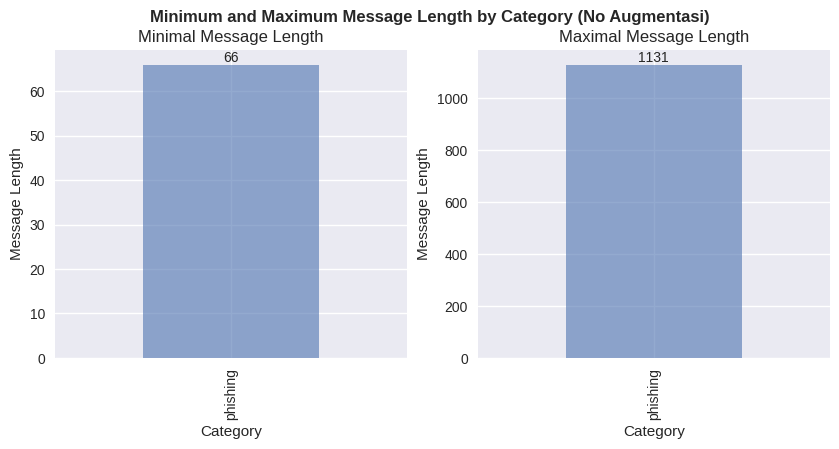

In [39]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum Message Length by Category (No Augmentasi)', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal Message Length')
    axes[0].set_ylabel('Message Length')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal Message Length')
    axes[1].set_ylabel('Message Length')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

plot_text_length(df_phishing_no_aug, 'message_length', 'Category')

### 📫 4.1.3 - Box Plot

<ipython-input-40-92c2f207d2de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='message_length', data=df_phishing_no_aug, palette='rocket', whis=3.0)


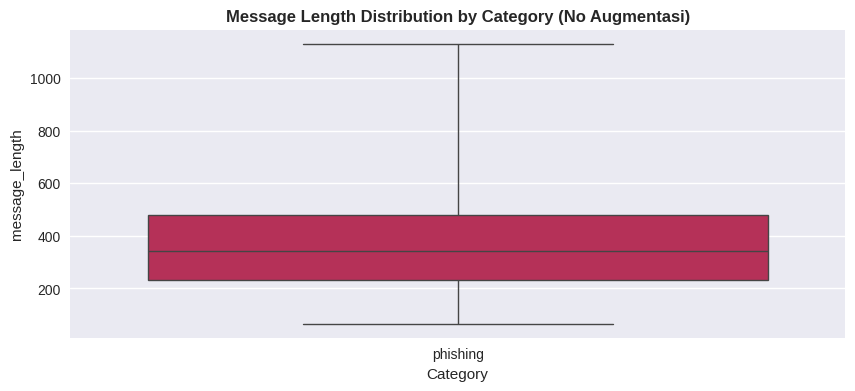

In [40]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='message_length', data=df_phishing_no_aug, palette='rocket', whis=3.0)

plt.title('Message Length Distribution by Category (No Augmentasi)', fontweight="bold")

plt.show()

In [41]:
df_phishing_no_aug.groupby('Category')['message_length'].mean()

Category
phishing    380.864407
Name: message_length, dtype: float64

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya rata-rata panjang pesannya sekitar 381.

## ✨ 4.2 - Dataset Phishing Augmentasi

### 📫 4.2.1 - Check duplicate data

In [42]:
df_phishing_aug['message_length'] = df_phishing_aug['Data'].apply(len)

### 📫 4.2.2 - Bar Plot

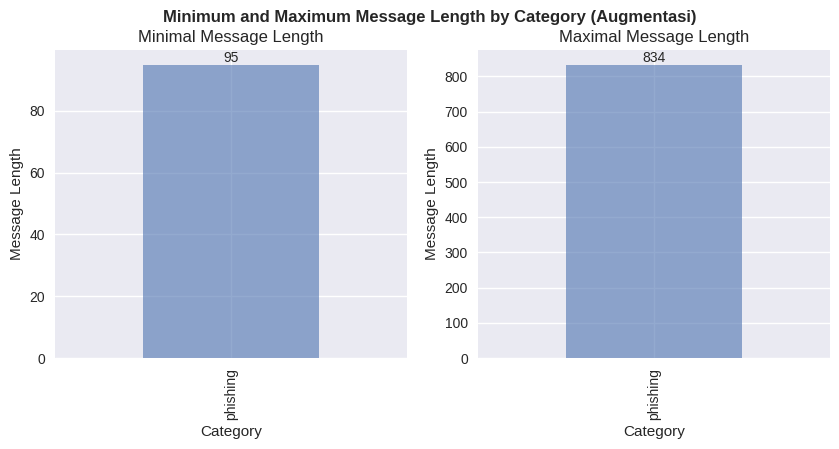

In [43]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum Message Length by Category (Augmentasi)', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal Message Length')
    axes[0].set_ylabel('Message Length')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal Message Length')
    axes[1].set_ylabel('Message Length')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

plot_text_length(df_phishing_aug, 'message_length', 'Category')

### 📫 4.2.3 - Box Plot

<ipython-input-44-8191e8d4c9b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='message_length', data=df_phishing_aug, palette='rocket', whis=3.0)


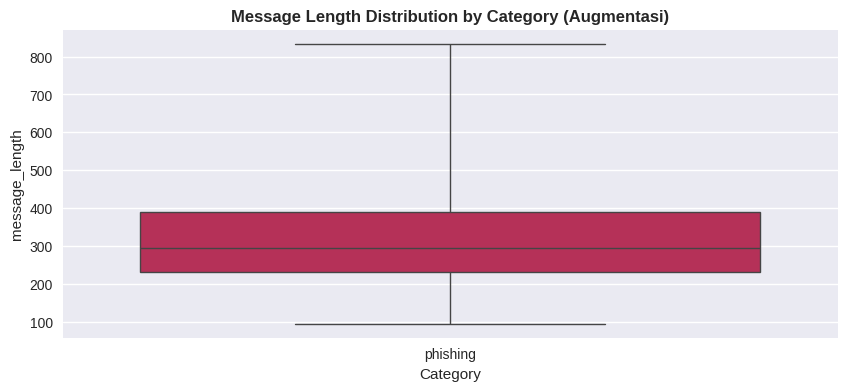

In [44]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='message_length', data=df_phishing_aug, palette='rocket', whis=3.0)

plt.title('Message Length Distribution by Category (Augmentasi)', fontweight="bold")

plt.show()

In [45]:
df_phishing_aug.groupby('Category')['message_length'].mean()

Category
phishing    326.880226
Name: message_length, dtype: float64

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya rata-rata panjang pesannya sekitar 327.

# 🎯 **Step 5: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 10 kata teratas yang paling banyak kemunculannya

🔎 Tujuan: tren popularitas dan pola perilaku dalam penggunaan Pesan Phishing.

In [46]:

def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Data': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # axes[1, 1].axis('off')

    for i, plot_info in enumerate(plot_data):

        ax = axes[i]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'], fontweight="bold")

    plt.tight_layout()

    plt.show()

In [50]:
df_no_aug = df_phishing_no_aug[df_phishing_no_aug['Category'] == 'phishing']

df_aug = df_phishing_aug[df_phishing_aug['Category'] == 'phishing']

## ✨ 5.1 - Unigram

In [51]:
stop_words = None

n = 10

unigram_no_aug = get_top_ngrams(df_no_aug['Data'], (1, 1), stop_words, n)

unigram_aug = get_top_ngrams(df_aug['Data'], (1, 1), stop_words, n)

unigram_no_aug.head()


,Data,Frequency
0,anda,73
1,untuk,68
2,di,61
3,dan,60
4,kami,44


<ipython-input-46-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-46-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


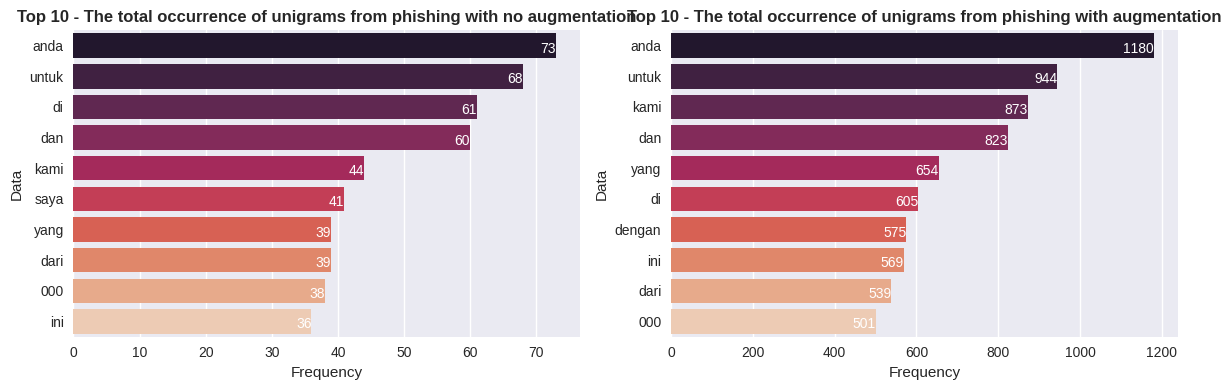

In [52]:
plot_data = [

    {'data': unigram_no_aug, 'title': 'Top 10 - The total occurrence of unigrams from phishing with no augmentation'},

    {'data': unigram_aug, 'title': 'Top 10 - The total occurrence of unigrams from phishing with augmentation'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'anda' dan 'untuk' menempati posisi 3 teratas.

## ✨ 5.2 - Bigram

In [53]:
stop_words = None

n = 10

bigram_no_aug = get_top_ngrams(df_no_aug['Data'], (2, 2), stop_words, n)

bigram_aug = get_top_ngrams(df_aug['Data'], (2, 2), stop_words, n)

bigram_no_aug.head()


,Data,Frequency
0,000 000,16
1,paruh waktu,13
2,di bawah,9
3,https www,8
4,kami dari,8


<ipython-input-46-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-46-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


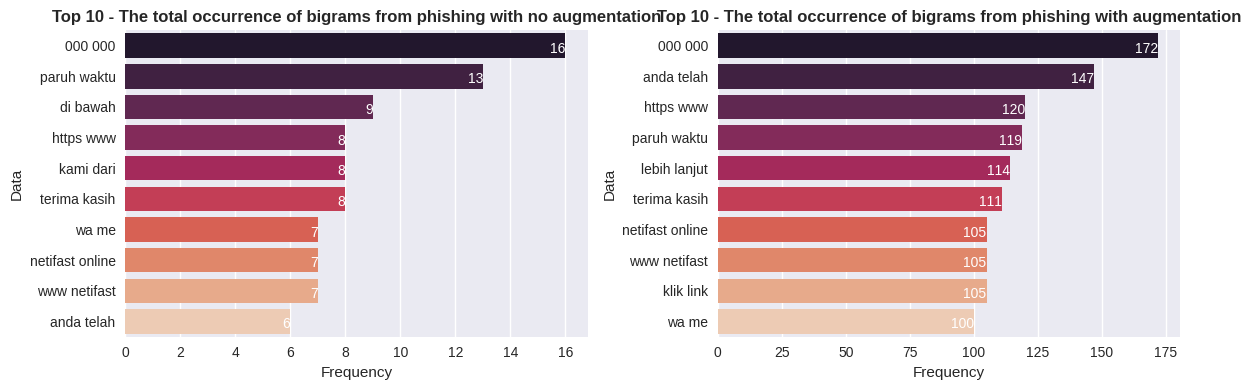

In [57]:
plot_data = [

    {'data': bigram_no_aug, 'title': 'Top 10 - The total occurrence of bigrams from phishing with no augmentation'},

    {'data': bigram_aug, 'title': 'Top 10 - The total occurrence of bigrams from phishing with augmentation'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya posisi pertama selalu ditempati bigram '000 000'


## ✨ 5.3 - Trigram

In [55]:
stop_words = None

n = 10

trigram_no_aug = get_top_ngrams(df_no_aug['Data'], (3, 3), stop_words, n)

trigram_aug = get_top_ngrams(df_aug['Data'], (3, 3), stop_words, n)

trigram_no_aug.head()


,Data,Frequency
0,https www netifast,7
1,www netifast online,7
2,di bawah ini,5
3,kerja paruh waktu,5
4,https wa me,4


<ipython-input-46-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-46-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


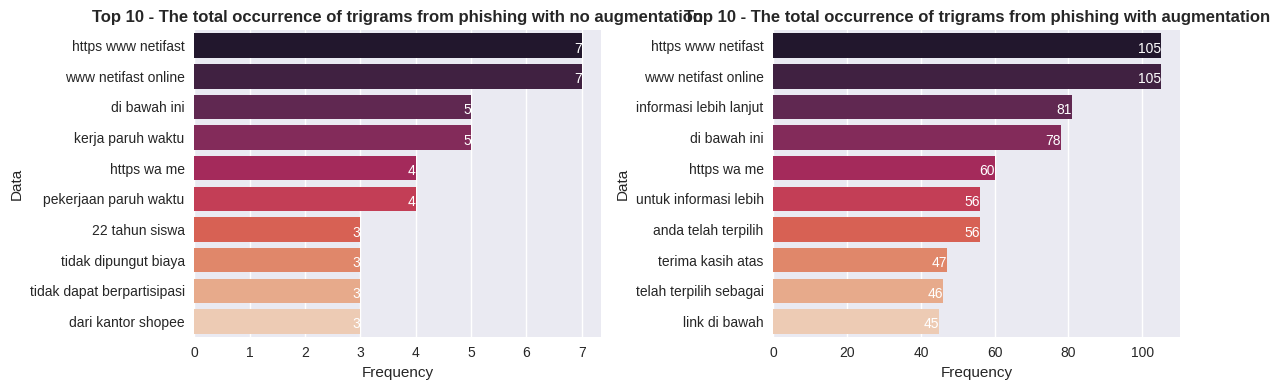

In [58]:
plot_data = [

    {'data': trigram_no_aug, 'title': 'Top 10 - The total occurrence of trigrams from phishing with no augmentation'},

    {'data': trigram_aug, 'title': 'Top 10 - The total occurrence of trigrams from phishing with augmentation'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya 2 posisi teratas ditempati oleh trigram yang memiliki kata netifast

# 🎯 **Step 6: Check the wordcloud**

---


🔎 At this stage I display a wordcloud from each class of course with additions from all classes

In [66]:
def create_wordcloud(palette, data_target):

    sentiment_data = ' '.join(data_target)

    wordcloud = WordCloud(background_color='black', colormap=palette, collocations=False).generate(sentiment_data)

    return wordcloud

def plot_wordcloud(plot_data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

    for i, plot_info in enumerate(plot_data):

        col = i % 2
        ax = axes[col]

        ax.imshow(plot_info['data'], interpolation='bilinear')
        ax.axis("off")
        ax.set_title(plot_info['title'], fontsize=28)

    plt.tight_layout()
    plt.show()

In [60]:
wordcloud_no_aug = create_wordcloud('Greens', df_no_aug['Data'])

wordcloud_aug = create_wordcloud('Blues', df_aug['Data'])

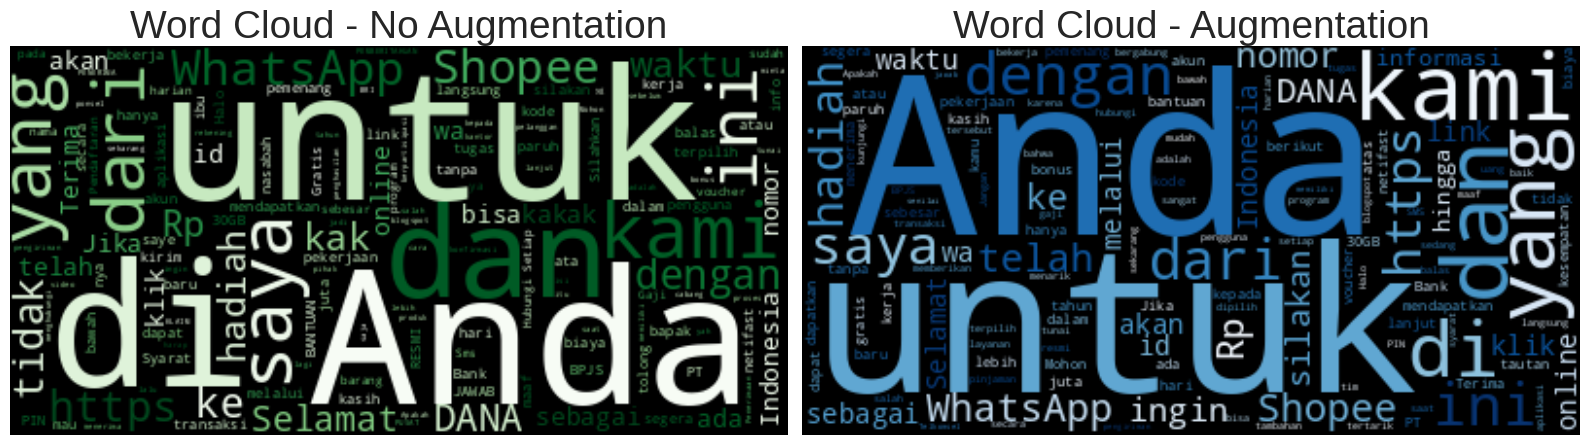

In [67]:
# Contoh penggunaan
plot_data = [

    {'data': wordcloud_no_aug , 'title': 'Word Cloud - No Augmentation'},

    {'data': wordcloud_aug, 'title': 'Word Cloud - Augmentation'},
]

plot_wordcloud(plot_data)

# 🎯 **Step 7: Save data after preprocessing**

---


## ✨ 7.1 - Dataset Phishing No Augmentasi

In [68]:
df_phishing_no_aug.head()

,Data,Category,message_length
0,PEMBERITAHUAN RESMI\n\nAnda Terdaftar Sebagai ...,phishing,217
1,SELAMAT ANDA TERPILIH SEBAGAI PENERIMA DANA BA...,phishing,177
2,Langsung dapat ekstra 100% di depan\nUntuk pen...,phishing,99
3,PEMBERITAHUAN RESMI\nSelamat ANDA TERPILIH Seb...,phishing,484
4,"Gapai impianmu dsni, Ksmpatan emas\ninfo pst j...",phishing,126


In [70]:
df_phishing_no_aug.drop(columns=['message_length'], inplace=True)

df_phishing_no_aug.head()

,Data,Category
0,PEMBERITAHUAN RESMI\n\nAnda Terdaftar Sebagai ...,phishing
1,SELAMAT ANDA TERPILIH SEBAGAI PENERIMA DANA BA...,phishing
2,Langsung dapat ekstra 100% di depan\nUntuk pen...,phishing
3,PEMBERITAHUAN RESMI\nSelamat ANDA TERPILIH Seb...,phishing
4,"Gapai impianmu dsni, Ksmpatan emas\ninfo pst j...",phishing


## ✨ 7.2 - Dataset Phishing Augmentasi

In [69]:
df_phishing_aug.head()

,Data,Category,message_length
0,Selamat! Anda telah terdaftar sebagai penerima...,phishing,240
1,BPJS Kesehatan Pusat telah mengumumkan nama an...,phishing,249
2,Rp.50 juta adalah besarnya Bantuan Dana yang a...,phishing,233
3,"Yakin anda ingin meningkatkan kesehatan? Yuk, ...",phishing,295
4,Apabila anda sedang mencari solusi penunjang b...,phishing,300


In [71]:
df_phishing_aug.drop(columns=['message_length'], inplace=True)

df_phishing_aug.head()

,Data,Category
0,Selamat! Anda telah terdaftar sebagai penerima...,phishing
1,BPJS Kesehatan Pusat telah mengumumkan nama an...,phishing
2,Rp.50 juta adalah besarnya Bantuan Dana yang a...,phishing
3,"Yakin anda ingin meningkatkan kesehatan? Yuk, ...",phishing
4,Apabila anda sedang mencari solusi penunjang b...,phishing


# 🎯 **Step 8: Combine datasets into 1**

---


In [73]:
df_merge_phishing = pd.concat([df_phishing_no_aug, df_phishing_aug], axis=0, ignore_index=True)

df_merge_phishing.head()

,Data,Category
0,PEMBERITAHUAN RESMI\n\nAnda Terdaftar Sebagai ...,phishing
1,SELAMAT ANDA TERPILIH SEBAGAI PENERIMA DANA BA...,phishing
2,Langsung dapat ekstra 100% di depan\nUntuk pen...,phishing
3,PEMBERITAHUAN RESMI\nSelamat ANDA TERPILIH Seb...,phishing
4,"Gapai impianmu dsni, Ksmpatan emas\ninfo pst j...",phishing


In [74]:
df_merge_phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      944 non-null    object
 1   Category  944 non-null    object
dtypes: object(2)
memory usage: 14.9+ KB


In [75]:
df_merge_phishing.to_csv('/content/drive/MyDrive/TUGAS AKHIR/Dataset/PESAN TEKS/aa_pesan-teks-phishing.csv', index=False)